## Prepare Exercises

In [21]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as ac

import warnings
warnings.filterwarnings("ignore")

In [2]:
store_df = ac.acquire_store_data()

In [3]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
store_df.shape

(913000, 19)

In [5]:
store_df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Using your store items data:

#### The end result of this exercise should be a file named prepare.py.

### 1. Convert date column to datetime format.


In [6]:
store_df.sale_date = pd.to_datetime(store_df.sale_date)
#store_df = store_df.set_index('sale_date').sort_index()

In [7]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 2. Plot the distribution of sale_amount and item_price.


<AxesSubplot:xlabel='sale_date'>

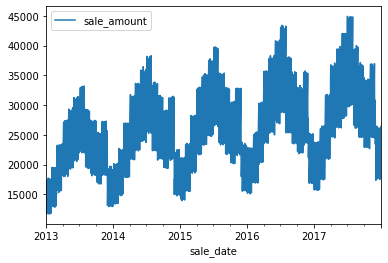

In [8]:
by_date = store_df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

### 3. Set the index to be the datetime variable.


In [9]:
# Done
#store_df.set_index('index').sort_index()
#store_df.head(2)

### 4. Add a 'month' and 'day of week' column to your dataframe.


In [10]:
store_df['month'] = store_df.sale_date.dt.month

In [13]:
store_df['day'] = store_df.sale_date.dt.day

In [14]:
store_df.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,...,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,...,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,...,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [ ]:
store_df['sales_total'] = store_df.

In [16]:
store_df.groupby('item_id').sum()

,Unnamed: 0,item,sale_amount,sale_id,store,store_id,store_zipcode,level_0,index,item_price,item_upc12,item_upc14,month,day
item_id,,,,,,,,,,,,,,
1,166704670,18260,401384.0,166722930,100430,100430,1428384848,0,0.0,15338.4,642756820877380,642756820877380,119120,287190
2,500132270,36520,1069564.0,500150530,100430,100430,1428384848,18260,18260.0,117594.4,202888063790500,202888063790500,119120,287190
3,833559870,54780,669087.0,833578130,100430,100430,1428384848,36520,36520.0,44371.8,436840008338140,436840008338140,119120,287190
4,1166987470,73040,401907.0,1167005730,100430,100430,1428384848,54780,54780.0,57336.4,3807735888127820,3807735888127820,119120,287190
5,1500415070,91300,335230.0,1500433330,100430,100430,1428384848,73040,73040.0,47658.6,13864509406657360,13864509406657360,119120,287190
6,1833842670,109560,1068281.0,1833860930,100430,100430,1428384848,91300,91300.0,126541.8,1354351298246320,1354351298246320,119120,287190
7,2167270270,127820,1068777.0,2167288530,100430,100430,1428384848,109560,109560.0,176026.4,1281434832113040,1281434832113040,119120,287190
8,2500697870,146080,1405108.0,2500716130,100430,100430,1428384848,127820,127820.0,30676.8,942217461073900,942217461073900,119120,287190
9,2834125470,164340,938379.0,2834143730,100430,100430,1428384848,146080,146080.0,32685.4,357912854253900,357912854253900,119120,287190


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [ ]:
# Save in prepare.py

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



In [17]:
open_power = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [18]:
open_power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.


In [19]:
open_power.Date = pd.to_datetime(open_power.Date)

In [20]:
open_power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [36]:
open_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [38]:
open_power.shape

(4383, 5)

### 2. Plot the distribution of each of your variables.


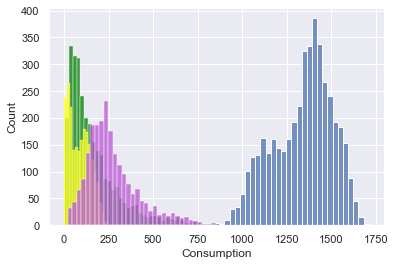

In [35]:
sns.set_theme(style="darkgrid")


sns.histplot(open_power, x="Consumption")
sns.histplot(open_power, x="Wind", color='Green')
sns.histplot(open_power, x="Solar", color='Yellow')
sns.histplot(open_power, x="Wind+Solar", color='mediumorchid')

plt.show()

### 3. Set the index to be the datetime variable.


In [ ]:
open_power = open_power.set_index('sale_date').sort_index()

### 4. Add a month and a year column to your dataframe.


### 5. Fill any missing values.


In [ ]:
fillna(0)

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.